**Visualizing MLPs**

We're going to visualize random fully connected networks that map 2D->2D, to get a visceral sense of the effect of network depth and nonlinear activation.

The basic idea: take a patch of input space, feed it through the network point by point, and display the outputs in a way that visually connects points that were nearby in input space.

In [1]:
#@title imports
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

tfkl = tf.keras.layers

In [2]:
#@title Fn to create a fully connected network
def randomly_initialized_mlp(hidden_layer_sizes, 
                             activation_fn, 
                             kernel_mean=0.05, 
                             kernel_std=0.4, 
                             bias_mean=0.05, 
                             bias_std=0.4):
  
  """Creates a randomly initialized MLP for visualizing.

  Args: 
    hidden_layer_sizes: A list of the number of units in each hidden layer.
    activation_fn: The nonlinear activation to use in each fully connected 
      layer.  Can be the keras string identifiers (e.g. 'relu') or the actual fn
      (e.g. tf.nn.relu).
    kernel_mean: The mean of the normally distributed weights for the kernels.
    kernel_std: The stddev of the normally distributed weights for the kernels.
    bias_mean: The mean of the normally distributed weights for the biases.
    bias_std: The stddev of the normally distributed weights for the biases.
  Returns:
    A tf.keras.Sequential model.
  """
  input_dimension = output_dimension = 2

  kernel_initializer = tf.keras.initializers.random_normal(mean=kernel_mean, stddev=kernel_std)
  bias_initializer = tf.keras.initializers.random_normal(mean=bias_mean, stddev=bias_std)

  layers = [tfkl.Input(input_dimension)]
  for hidden_dimension in hidden_layer_sizes:
    layers += [tfkl.Dense(hidden_dimension, activation=activation_fn, 
                          kernel_initializer=kernel_initializer,
                          bias_initializer=bias_initializer)]
  layers += [tfkl.Dense(output_dimension)]

  rand_net = tf.keras.Sequential(layers)
  return rand_net

In [3]:
#@title Fn to create input grid of points
def grid(side_length):
  xxx, yyy = np.meshgrid(np.linspace(-1., 1., side_length),
                        np.linspace(-1., 1., side_length))
  inp_pts = np.stack([xxx, yyy], axis=-1)
  return inp_pts

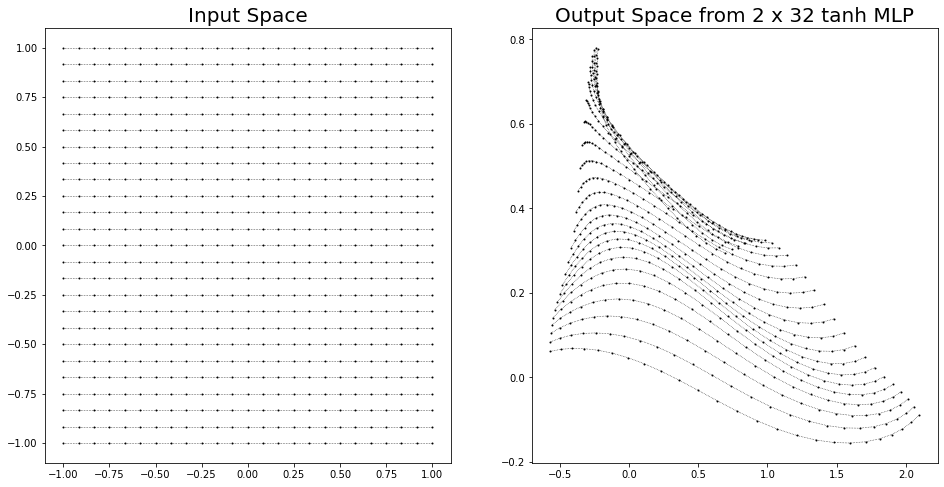

In [4]:
#@title A small example to show what's going on
units_per_layer = 32
num_layers = 2
hidden_layer_sizes = [units_per_layer]*num_layers
activation_fn = 'tanh'
rand_net = randomly_initialized_mlp(hidden_layer_sizes, activation_fn)

# Make a grid of points to feed through the network
grid_side_length = 25
inp_pts = grid(grid_side_length)

outp_pts = rand_net(inp_pts)

plt.figure(figsize=(16, 8))
plt.subplot(121)
# This will plot each row of points individually so that they will be connected
# by a connecting line, making the output easier to parse
[plt.plot(inp_pts[i, :, 0], inp_pts[i, :, 1], 'ko:', lw=0.6, markersize=1) for i in range(grid_side_length)]
plt.title('Input Space', fontsize=20)
plt.subplot(122)
[plt.plot(outp_pts[i, :, 0], outp_pts[i, :, 1], 'ko:', lw=0.6, markersize=1) for i in range(grid_side_length)]
plt.title(f'Output Space from {num_layers} x {units_per_layer} {activation_fn} MLP', fontsize=20)
plt.show()

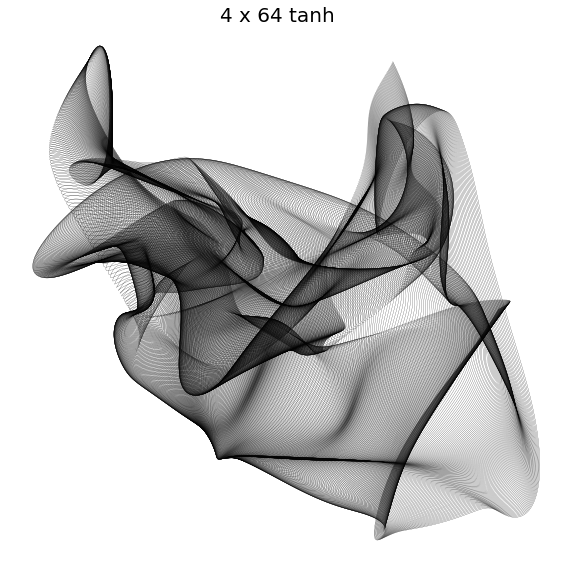

In [5]:
#@title Black and white fabric 
activation_fn = 'tanh' #@param ["relu", "tanh", "elu", "softsign"] {allow-input: true}
units_per_layer = 64  #@param{type:"integer"}
num_layers = 4 #@param {type:"slider", min:1, max:10, step:1}
kernel_std = 0.5 #@param {type:"raw"}
bias_std = 0.5 #@param {type:"raw"}

plotting_linewidth = 0.2
grid_side_length = 600
inp_pts = grid(grid_side_length)

hidden_layer_sizes = [units_per_layer]*num_layers

rand_net = randomly_initialized_mlp(hidden_layer_sizes, activation_fn,
                                    kernel_std=kernel_std,
                                    bias_std=bias_std)

outp_pts = rand_net(inp_pts)
plt.figure(figsize=(10, 10))
_ = [plt.plot(outp_pts[i, :, 0], outp_pts[i, :, 1], 'k', lw=plotting_linewidth) for i in range(grid_side_length)]
plt.axis('off')
plt.suptitle(f'{num_layers} x {units_per_layer} {activation_fn}', y=0.9, fontsize=20)
plt.show()

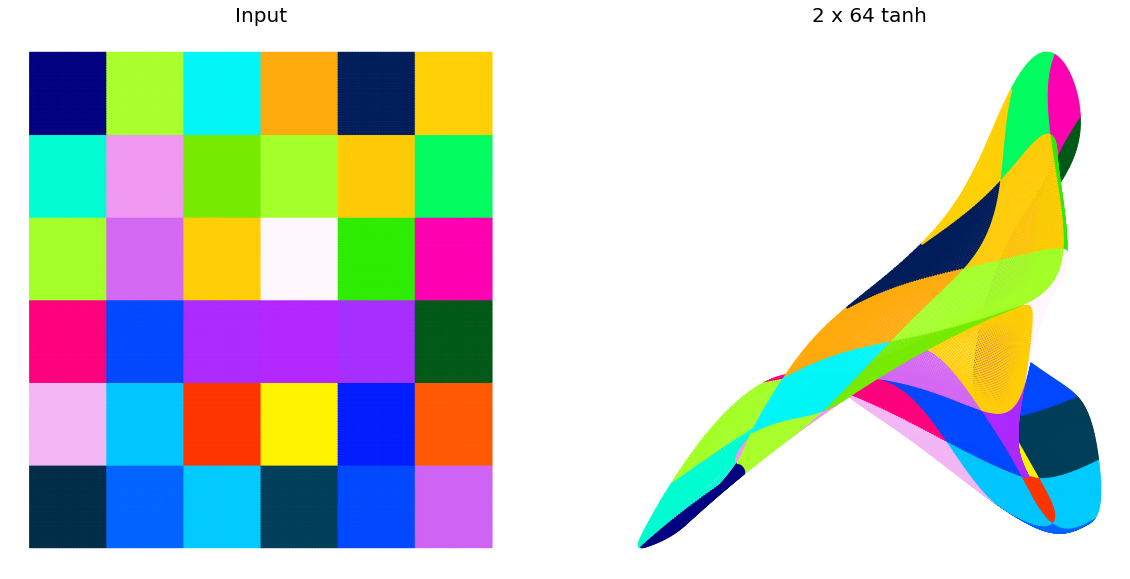

In [6]:
#@title Colored quilt
activation_fn = 'tanh' #@param ["relu", "tanh", "elu", "softsign"] {allow-input: true}
units_per_layer = 64  #@param{type:"integer"}
num_layers = 2 #@param {type:"slider", min:1, max:12, step:1}
kernel_std = 0.5 #@param {type:"raw"}
bias_std = 0.5 #@param {type:"raw"}

hidden_layer_sizes = [units_per_layer]*num_layers

rand_net = randomly_initialized_mlp(hidden_layer_sizes, activation_fn,
                                    kernel_std=kernel_std,
                                    bias_std=bias_std)

grid_side_length = 300
num_squares_per_side = 6
color_map = 'gist_ncar'
inp_pts = grid(grid_side_length)
inp_pts = np.reshape(inp_pts, [-1, 2])

# Randomly color the patches of the input
color_floats = np.zeros((grid_side_length, grid_side_length))
chunk_side_length = grid_side_length//num_squares_per_side
for chunk_start_x in range(0, grid_side_length, chunk_side_length):
  for chunk_start_y in range(0, grid_side_length, chunk_side_length):
    color_floats[chunk_start_x:chunk_start_x+chunk_side_length,
                chunk_start_y:chunk_start_y+chunk_side_length
                ] = np.random.uniform()
color_floats = np.reshape(color_floats, [-1])

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.scatter(inp_pts[:, 0], inp_pts[:, 1], s=2, c=color_floats, cmap=color_map)
plt.title('Input', fontsize=20)
plt.axis('off')

plt.subplot(122)
outp_pts = rand_net(inp_pts)
plt.scatter(outp_pts[:, 0], outp_pts[:, 1], s=2, c=color_floats, cmap=color_map)
plt.axis('off')
plt.title(f'{num_layers} x {units_per_layer} {activation_fn}', fontsize=20)
plt.show()

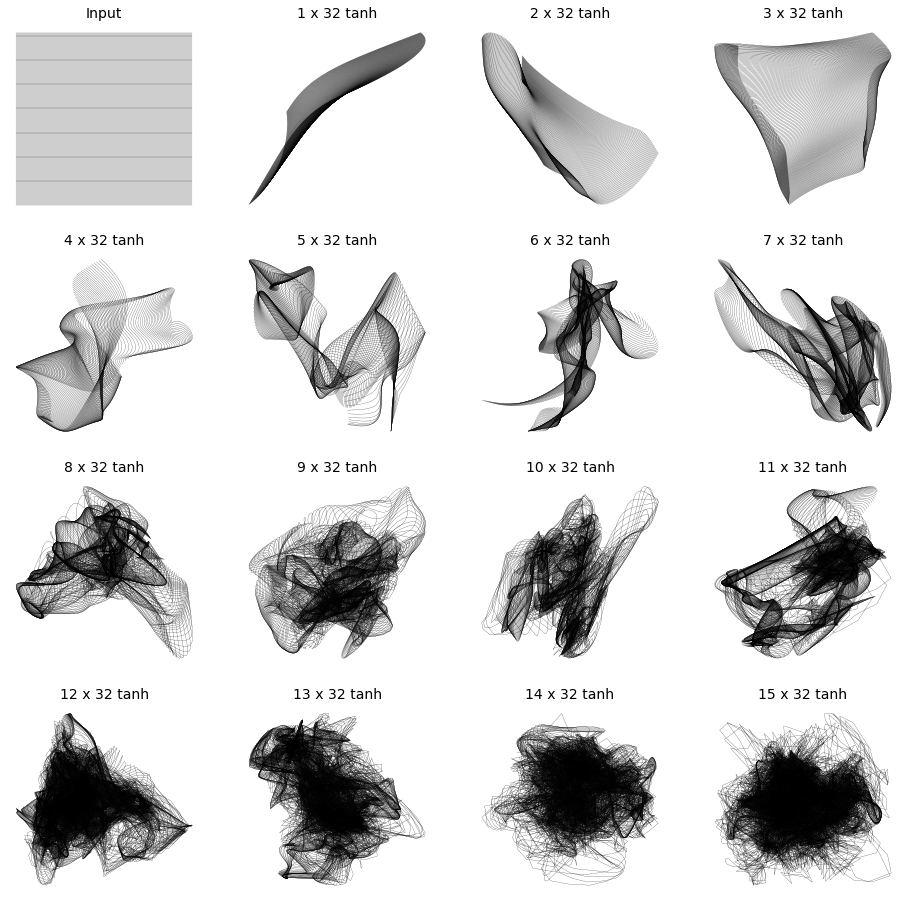

In [8]:
# Do a simple scan
activation_fn = 'tanh' #@param ["relu", "tanh", "elu", "softsign"] {allow-input: true}
units_per_layer = 32  #@param{type:"integer"}
kernel_std = 0.5 #@param {type:"raw"}
bias_std = 0.5 #@param {type:"raw"}
colored_quilt = False #@param {type:"boolean"}

if colored_quilt:
  grid_side_length = 180
  num_squares_per_side = 6
  color_map = 'gist_ncar'
  # Randomly color the patches of the input
  color_floats = np.zeros((grid_side_length, grid_side_length))
  chunk_side_length = grid_side_length//num_squares_per_side
  for chunk_start_x in range(0, grid_side_length, chunk_side_length):
    for chunk_start_y in range(0, grid_side_length, chunk_side_length):
      color_floats[chunk_start_x:chunk_start_x+chunk_side_length,
                  chunk_start_y:chunk_start_y+chunk_side_length
                  ] = np.random.uniform()
  color_floats = np.reshape(color_floats, [-1])
  inp_pts = grid(grid_side_length)
  inp_pts = np.reshape(inp_pts, [-1, 2])

else:
  grid_side_length = 180
  plotting_linewidth = 0.2
  inp_pts = grid(grid_side_length)

inches_per = 4
plt.figure(figsize=(4*inches_per, 4*inches_per))
plt.subplot(4, 4, 1)
if colored_quilt:
  plt.scatter(inp_pts[:, 0], inp_pts[:, 1], s=2, c=color_floats, cmap=color_map)
else:
  _ = [plt.plot(inp_pts[i, :, 0], inp_pts[i, :, 1], 'k', lw=plotting_linewidth) for i in range(grid_side_length)]
plt.title('Input', fontsize=14)
plt.axis('off')
for num_layers in range(1, 16):
  hidden_layer_sizes = [units_per_layer]*num_layers

  rand_net = randomly_initialized_mlp(hidden_layer_sizes, activation_fn,
                                      kernel_std=kernel_std,
                                      bias_std=bias_std)

  plt.subplot(4, 4, num_layers+1)
  outp_pts = rand_net(inp_pts)
  if colored_quilt:
    plt.scatter(outp_pts[:, 0], outp_pts[:, 1], s=2, c=color_floats, cmap=color_map)
  else:
    _ = [plt.plot(outp_pts[i, :, 0], outp_pts[i, :, 1], 'k', lw=plotting_linewidth) for i in range(grid_side_length)]
  
  plt.axis('off')
  plt.title(f'{num_layers} x {units_per_layer} {activation_fn}', fontsize=14)
plt.show()